load 30m poloniex data

In [1]:
%%capture
cd ..

In [2]:
# plotting
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (11.5,6)
plt.style.use('ggplot')

# numeric
import numpy as np
from numpy import random
import pandas as pd

import glob

from tqdm import tqdm_notebook as tqdm

import os, json

In [3]:
import time
dfs=[]
for infile in glob.glob('data/usa_stock/*.csv'):
    df = pd.read_csv(infile, parse_dates=['date'])
#     print(df)
    df['timestamp'] = pd.to_datetime(df['date'], unit='s')
    
    del df['date']
    df.rename(columns={'timestamp':'date'}, inplace=True)
    # date
    df.index=pd.to_datetime(df.date)
#     print(df['date'])
    del df['date']
    # 
    df = df[['close','high','low','open']]
#     df = df[['close','high','low','open','zturnover','zPB','zPE']] #PB=Price to Book ratio, PE=Price to Earning ratio
#     df=df.resample('30T').first()
    
    # name cols
    name = os.path.splitext(os.path.basename(infile))[0]
#     df.columns = ['%s|%s'%(name,col) for col in df.columns]
    df.name=name
    
    dfs.append(df)

In [4]:
# print(dfs)

In [5]:
dfs.sort(key=lambda x:x.name, reverse=False)
[(df.name,df.index[0]) for df in dfs]

[('APA', Timestamp('2010-01-04 00:00:00')),
 ('BEN', Timestamp('2010-01-04 00:00:00')),
 ('DVN', Timestamp('2010-01-04 00:00:00')),
 ('FCX', Timestamp('2010-01-04 00:00:00')),
 ('HAL', Timestamp('2010-01-04 00:00:00')),
 ('MOS', Timestamp('2010-01-04 00:00:00')),
 ('NEM', Timestamp('2010-01-04 00:00:00')),
 ('OXY', Timestamp('2010-01-04 00:00:00')),
 ('SLB', Timestamp('2010-01-04 00:00:00')),
 ('WBA', Timestamp('2010-01-04 00:00:00'))]

In [6]:
# # insert a fake one, the price of one bitcoin in bitcoin = 1
# df=dfs[0].copy()
# df[:]=1
# df.name='BTCBTC'
# dfs.insert(0,df)

In [7]:
# crop to ones with more data
dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2014-07-01')]
# dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2014-08-15')]
# dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2015-08-09')]

# also only ones that are in BTC
# dfs1= [df for df in dfs1 if df.name.endswith('BTC')]
# print([str(min(df.index)) for df in dfs1])

In [8]:
# # something is wrong with DOGEBTC when I plot it, it has jumps and flat intervals everywhere, I think it might be a rounding error in the data
# blacklist = ['DOGEBTC', 'XRPBTC']
# dfs1 = [d for d in dfs1 if d.name not in blacklist]

In [9]:
print('restricted from', len(dfs), 'to', len(dfs1))

restricted from 10 to 10


In [10]:
# # reindex
# mi = dfs1[0].index.copy()
# for i in range(len(dfs1)):
#     name = dfs1[i].name
#     dfs[i]=dfs1[i].reindex(mi, method='pad')
#     dfs[i][np.isnan(dfs[i])]=0
#     dfs[i].name = name

In [11]:
# concat
df = pd.concat(dfs1, axis=1, keys=[df.name for df in dfs1], names=['Pair','Price'])
df

Pair              APA                                         BEN             \
Price           close       high        low       open      close       high   
date                                                                           
2010-01-04  79.975365  80.421054  78.963111  79.272832  20.685516  20.746807   
2010-01-05  80.919579  80.949796  79.499403  80.058411  20.846413  20.878974   
2010-01-06  82.188690  82.279336  80.201956  80.662757  20.861732  20.999635   
2010-01-07  80.942238  81.826067  80.209489  81.826067  20.674044  20.951766   
2010-01-08  80.519226  80.677867  79.235030  80.156632  20.695108  20.698940   
...               ...        ...        ...        ...        ...        ...   
2025-05-13  18.459999  18.730000  17.700001  17.780001  21.580000  21.969999   
2025-05-14  18.170000  18.450001  18.049999  18.250000  22.010000  22.080000   
2025-05-15  17.760000  17.799999  17.370001  17.660000  22.180000  22.200001   
2025-05-16  17.590000  17.889999  17.299999  17.889999  22.379999  22.420000   
2025-05-19  17.320000  17.350000  16.950001  17.330000  22.209999  22.260000   

Pair                                    DVN             ...        OXY  \
Price             low       open      close       high  ...        low   
date                                                    ...              
2010-01-04  20.283298  20.336927  50.045765  50.189557  ...  50.959239   
2010-01-05  20.570606  20.612743  50.098061  50.156882  ...  50.853845   
2010-01-06  20.746812  20.794695  49.947723  50.130729  ...  50.729840   
2010-01-07  20.612753  20.842593  49.653595  49.745098  ...  51.064612   
2010-01-08  20.264160  20.626157  49.751640  49.830069  ...  50.543860   
...               ...        ...        ...        ...  ...        ...   
2025-05-13  21.570000  21.719999  34.290001  34.599998  ...  43.680000   
2025-05-14  21.510000  21.910000  33.959999  34.200001  ...  43.610001   
2025-05-15  21.910000  21.980000  33.400002  33.509998  ...  42.400002   
2025-05-16  22.150000  22.160000  33.259998  33.709999  ...  42.660000   
2025-05-19  22.040001  22.150000  32.689999  32.880001  ...  41.889999   

Pair                         SLB                                         WBA  \
Price            open      close       high        low       open      close   
date                                                                           
2010-01-04  51.244415  46.920071  46.982992  46.227912  46.416681  22.702435   
2010-01-05  51.566782  47.052921  47.276650  46.654405  46.836181  22.519842   
2010-01-06  51.083208  48.101635  48.199516  46.864134  46.962014  22.349422   
2010-01-07  51.424176  48.598022  48.807765  47.689123  47.884885  22.483326   
2010-01-08  51.157601  49.395069  50.338923  48.304389  48.374308  22.513758   
...               ...        ...        ...        ...        ...        ...   
2025-05-13  43.939999  36.110001  36.439999  35.759998  36.060001  11.370000   
2025-05-14  43.880001  36.009998  36.340000  35.650002  35.700001  11.130000   
2025-05-15  43.009998  35.720001  35.750000  34.990002  35.470001  11.180000   
2025-05-16  43.660000  35.770000  35.810001  35.160000  35.669998  11.290000   
2025-05-19  42.529999  35.110001  35.470001  34.779999  35.380001  11.250000   

Pair                                         
Price            high        low       open  
date                                         
2010-01-04  22.702435  22.300729  22.525927  
2010-01-05  22.617225  22.288557  22.580706  
2010-01-06  22.696350  21.862505  22.008581  
2010-01-07  22.519845  22.197265  22.331165  
2010-01-08  22.562448  22.306819  22.471150  
...               ...        ...        ...  
2025-05-13  11.390000  11.310000  11.360000  
2025-05-14  11.370000  11.130000  11.360000  
2025-05-15  11.190000  11.070000  11.120000  
2025-05-16  11.310000  11.180000  11.190000  
2025-05-19  11.290000  11.200000  11.200000  

[3868 rows x 40 columns]

In [12]:
# crop to when they all exist
print('cropped from', len(df))
t=max([min(df1.index) for df1 in dfs1])
df=df[df.index>t]
print('to',len(df))

cropped from 3868
to 3867


In [13]:
# fill in na's
df = df.fillna(method="pad")

# replace rest
df.replace(np.nan, 0, inplace=True)
df.replace('--', 0, inplace=True)
# df.unstack()
df=df.astype(np.float32)
# df

In [14]:
# check stats
df.describe()

Pair           APA                                                 BEN  \
Price        close         high          low         open        close   
count  3867.000000  3867.000000  3867.000000  3867.000000  3867.000000   
mean     44.436588    45.083397    43.791367    44.466808    24.764355   
std      22.133411    22.266518    21.961409    22.139380     4.787975   
min       3.582176     3.706928     3.386137     3.599998    11.874746   
25%      28.399524    28.880152    27.962769    28.442023    21.538445   
50%      38.745472    39.451965    38.163918    38.813267    24.070036   
75%      63.928455    64.722839    63.235350    63.975832    27.454934   
max     101.604179   102.183174    99.400970   101.825119    36.857853   

Pair                                                  DVN               ...  \
Price         high          low         open        close         high  ...   
count  3867.000000  3867.000000  3867.000000  3867.000000  3867.000000  ...   
mean     25.035639    24.492279    24.768818    35.599617    36.124104  ...   
std       4.778606     4.793160     4.789860    13.211524    13.331082  ...   
min      12.235908    11.754985    12.164951     4.054822     4.467051  ...   
25%      21.842499    21.260486    21.565120    25.077349    25.513268  ...   
50%      24.338650    23.802889    24.098173    38.306362    38.818661  ...   
75%      27.716830    27.192626    27.468047    44.628157    45.262619  ...   
max      37.227432    36.400574    36.582233    68.412086    69.712234  ...   

Pair           OXY                       SLB                            \
Price          low         open        close         high          low   
count  3867.000000  3867.000000  3867.000000  3867.000000  3867.000000   
mean     51.585880    52.248413    48.709202    49.301914    48.109776   
std      13.908777    13.954758    14.780699    14.823430    14.722301   
min       8.159325     8.331704    10.876332    11.905293    10.713862   
25%      48.635077    49.241970    38.774601    39.415577    38.147625   
50%      55.343178    56.049313    51.110977    51.720802    50.604012   
75%      60.316086    60.985567    58.768351    59.482273    58.181225   
max      72.713058    73.304222    87.995529    88.599823    87.547897   

Pair                        WBA                                         
Price         open        close         high          low         open  
count  3867.000000  3867.000000  3867.000000  3867.000000  3867.000000  
mean     48.722404    36.625248    37.022812    36.223484    36.629528  
std      14.778280    14.817976    14.925828    14.696743    14.818299  
min      10.984642     8.006781     8.278525     7.977665     8.084423  
25%      38.773363    23.177390    23.377329    22.985814    23.200508  
50%      51.181606    37.014317    37.497177    36.443001    36.990723  
75%      58.785521    49.149788    49.671144    48.453426    49.187565  
max      88.256645    66.437309    66.863365    66.169304    66.677826  

[8 rows x 40 columns]

In [15]:
assert np.isfinite(df.values).all()

In [16]:
# split
test_split=0.088
c=int(len(df.index)*test_split)
split_time = df.index[-c]


df_test = df[df.index>split_time]
df_train = df[df.index<=split_time]
print('test#:',len(df_test), 'train#:',len(df_train), 'test_frac:', len(df_test)/len(df), 'cutoff_time:',split_time)

test#: 579 train#: 3288 test_frac: 0.14972847168347556 cutoff_time: 2023-01-26 00:00:00


In [17]:
# save
df_train.to_hdf('data/usaStock_1d_vol.hf',key='train', mode='w', append=False)
df_test.to_hdf('data/usaStock_1d_vol.hf',key='test', mode='a', append=False)
df_train

Pair              APA                                         BEN             \
Price           close       high        low       open      close       high   
date                                                                           
2010-01-05  80.919579  80.949799  79.499405  80.058411  20.846413  20.878973   
2010-01-06  82.188690  82.279335  80.201958  80.662758  20.861732  20.999634   
2010-01-07  80.942238  81.826065  80.209488  81.826065  20.674044  20.951767   
2010-01-08  80.519226  80.677864  79.235031  80.156631  20.695108  20.698940   
2010-01-11  80.760979  81.758118  79.975349  81.168892  21.147120  21.346313   
...               ...        ...        ...        ...        ...        ...   
2023-01-20  41.644787  42.106583  40.638069  41.432362  26.687374  26.758446   
2023-01-23  41.894157  42.466785  41.626316  42.189705  26.962776  27.184875   
2023-01-24  40.693485  41.533955  40.370224  41.478539  26.589649  27.051615   
2023-01-25  40.721195  40.813553  39.474346  40.518005  26.820633  26.847284   
2023-01-26  41.894157  41.921864  40.314816  41.386181  26.909472  27.149336   

Pair                                    DVN             ...        OXY  \
Price             low       open      close       high  ...        low   
date                                                    ...              
2010-01-05  20.570606  20.612743  50.098061  50.156883  ...  50.853844   
2010-01-06  20.746813  20.794695  49.947723  50.130730  ...  50.729839   
2010-01-07  20.612753  20.842594  49.653595  49.745098  ...  51.064613   
2010-01-08  20.264160  20.626158  49.751640  49.830067  ...  50.543861   
2010-01-11  20.714254  20.714254  49.071896  49.673203  ...  51.021202   
...               ...        ...        ...        ...  ...        ...   
2023-01-20  25.950005  26.207640  58.511993  58.692722  ...  63.305958   
2023-01-23  26.625185  26.705141  59.424694  59.876526  ...  64.176735   
2023-01-24  26.536346  26.651836  57.807144  59.750015  ...  62.164268   
2023-01-25  25.772327  26.145452  57.987869  57.996906  ...  60.287231   
2023-01-26  26.509693  26.936123  59.388546  59.397583  ...  62.657700   

Pair                         SLB                                         WBA  \
Price            open      close       high        low       open      close   
date                                                                           
2010-01-05  51.566784  47.052921  47.276649  46.654404  46.836182  22.519842   
2010-01-06  51.083206  48.101635  48.199516  46.864132  46.962013  22.349422   
2010-01-07  51.424175  48.598022  48.807766  47.689125  47.884884  22.483326   
2010-01-08  51.157600  49.395069  50.338924  48.304390  48.374310  22.513758   
2010-01-11  52.168098  49.395069  50.031296  48.500156  49.849518  22.550272   
...               ...        ...        ...        ...        ...        ...   
2023-01-20  63.973560  54.501476  56.060020  53.427605  54.634525  30.941214   
2023-01-23  65.124916  53.085487  54.834095  52.486778  54.644028  31.622469   
2023-01-24  62.270699  52.714859  53.636677  51.384396  51.384396  30.958452   
2023-01-25  61.786915  53.456116  53.693699  51.574459  52.410751  31.286154   
2023-01-26  63.257568  54.615520  54.691544  52.553299  53.807735  31.475868   

Pair                                         
Price            high        low       open  
date                                         
2010-01-05  22.617226  22.288557  22.580706  
2010-01-06  22.696350  21.862505  22.008581  
2010-01-07  22.519846  22.197264  22.331165  
2010-01-08  22.562449  22.306818  22.471151  
2010-01-11  22.605049  22.458977  22.519840  
...               ...        ...        ...  
2023-01-20  30.992952  30.294449  30.742872  
2023-01-23  31.674212  30.889471  31.001577  
2023-01-24  31.182663  30.725616  31.096428  
2023-01-25  31.424129  30.880850  31.018827  
2023-01-26  31.527611  31.036070  31.458620  

[3288 rows x 40 columns]

In [18]:
df_test

Pair              APA                                         BEN             \
Price           close       high        low       open      close       high   
date                                                                           
2023-01-27  42.235882  43.390373  41.958805  41.958805  27.291481  27.335901   
2023-01-30  40.785851  42.171238  40.748905  41.533962  27.771215  28.259832   
2023-01-31  40.942856  41.238403  39.982319  40.582653  27.717915  27.922245   
2023-02-01  40.083920  40.675018  38.541519  40.601128  28.437510  28.650726   
2023-02-02  39.123386  40.010033  38.569229  39.862259  30.045507  30.534124   
...               ...        ...        ...        ...        ...        ...   
2025-05-13  18.459999  18.730000  17.700001  17.780001  21.580000  21.969999   
2025-05-14  18.170000  18.450001  18.049999  18.250000  22.010000  22.080000   
2025-05-15  17.760000  17.799999  17.370001  17.660000  22.180000  22.200001   
2025-05-16  17.590000  17.889999  17.299999  17.889999  22.379999  22.420000   
2025-05-19  17.320000  17.350000  16.950001  17.330000  22.209999  22.260000   

Pair                                    DVN             ...        OXY  \
Price             low       open      close       high  ...        low   
date                                                    ...              
2023-01-27  26.589651  26.873936  58.981895  60.509083  ...  64.350906   
2023-01-30  26.527464  26.793982  56.334175  58.683693  ...  61.990108   
2023-01-31  27.273718  27.637959  57.147469  57.599300  ...  61.564388   
2023-02-01  27.149338  27.495813  55.927525  56.749855  ...  60.267883   
2023-02-02  28.801754  28.872828  55.078091  56.081154  ...  59.532555   
...               ...        ...        ...        ...  ...        ...   
2025-05-13  21.570000  21.719999  34.290001  34.599998  ...  43.680000   
2025-05-14  21.510000  21.910000  33.959999  34.200001  ...  43.610001   
2025-05-15  21.910000  21.980000  33.400002  33.509998  ...  42.400002   
2025-05-16  22.150000  22.160000  33.259998  33.709999  ...  42.660000   
2025-05-19  22.040001  22.150000  32.689999  32.880001  ...  41.889999   

Pair                         SLB                                         WBA  \
Price            open      close       high        low       open      close   
date                                                                           
2023-01-27  64.970123  54.140358  55.214230  53.788734  54.472973  32.053638   
2023-01-30  63.683296  53.541649  54.007313  53.332577  53.817245  31.501740   
2023-01-31  62.115879  54.149860  54.587013  53.199528  53.484627  31.786318   
2023-02-01  62.173931  52.933434  54.587006  52.268200  54.083332  32.062267   
2023-02-02  61.167698  49.692810  52.515289  49.388706  52.515289  32.519318   
...               ...        ...        ...        ...        ...        ...   
2025-05-13  43.939999  36.110001  36.439999  35.759998  36.060001  11.370000   
2025-05-14  43.880001  36.009998  36.340000  35.650002  35.700001  11.130000   
2025-05-15  43.009998  35.720001  35.750000  34.990002  35.470001  11.180000   
2025-05-16  43.660000  35.770000  35.810001  35.160000  35.669998  11.290000   
2025-05-19  42.529999  35.110001  35.470001  34.779999  35.380001  11.250000   

Pair                                         
Price            high        low       open  
date                                         
2023-01-27  32.364086  31.596592  31.631088  
2023-01-30  32.027775  31.484491  31.941542  
2023-01-31  31.812187  31.001577  31.475870  
2023-02-01  32.277855  31.191290  31.751820  
2023-02-02  32.734905  32.053646  32.165752  
...               ...        ...        ...  
2025-05-13  11.390000  11.310000  11.360000  
2025-05-14  11.370000  11.130000  11.360000  
2025-05-15  11.190000  11.070000  11.120000  
2025-05-16  11.310000  11.180000  11.190000  
2025-05-19  11.290000  11.200000  11.200000  

[579 rows x 40 columns]

In [19]:
# # drop cols and update multiindex
# df_train1 = df_train.drop(['volume','quoteVolume'],axis=1,level='Price')
# df_train1.columns = pd.MultiIndex.from_tuples(df_train1.columns.tolist(), names=df_train1.columns.names) # update index to remove dropped cols
# df_train1 = df_train1.sort_index(axis=1)

# df_test1 = df_test.drop(['volume','quoteVolume'],axis=1,level='Price')
# df_test1.columns = pd.MultiIndex.from_tuples(df_test1.columns.tolist(), names=df_test1.columns.names)
# df_test1 = df_test1.sort_index(axis=1)
# df_test1

In [20]:
# df_train1 = df_train1.sort_index(axis=1)

In [21]:
# # save
# df_train1.to_hdf('data/chinese_1d.hf',key='train', mode='w', append=False)
# df_test1.to_hdf('data/chinese_1d.hf',key='test', mode='a', append=False)

In [22]:
# # view timeseries
# plt.figure(figsize=(15,16))
# for i, d in enumerate(dfs1):
#     name = d.name
#     x=d.dropna().index
#     y=[-i]*len(x)
#     plt.scatter(x,y,label=name[:20], s=1)
# plt.legend()

In [23]:
# # View one day, normalized
# data_window = df.copy()
# open = data_window.xs('open', axis=1, level='Price')
# data_window = data_window.divide(open.iloc[-1], level='Pair')
# data_window = data_window.drop('open', axis=1, level='Price')
# data_window.xs('close', axis=1, level='Price').plot()

In [24]:
# # view timeseries
# plt.figure(figsize=(15,16))
# for i, d in enumerate(dfs):
#     name = d.name
#     x=d.dropna().index
#     y=[-i]*len(x)
#     plt.scatter(x,y,label=name[:20], s=1)
# plt.legend()

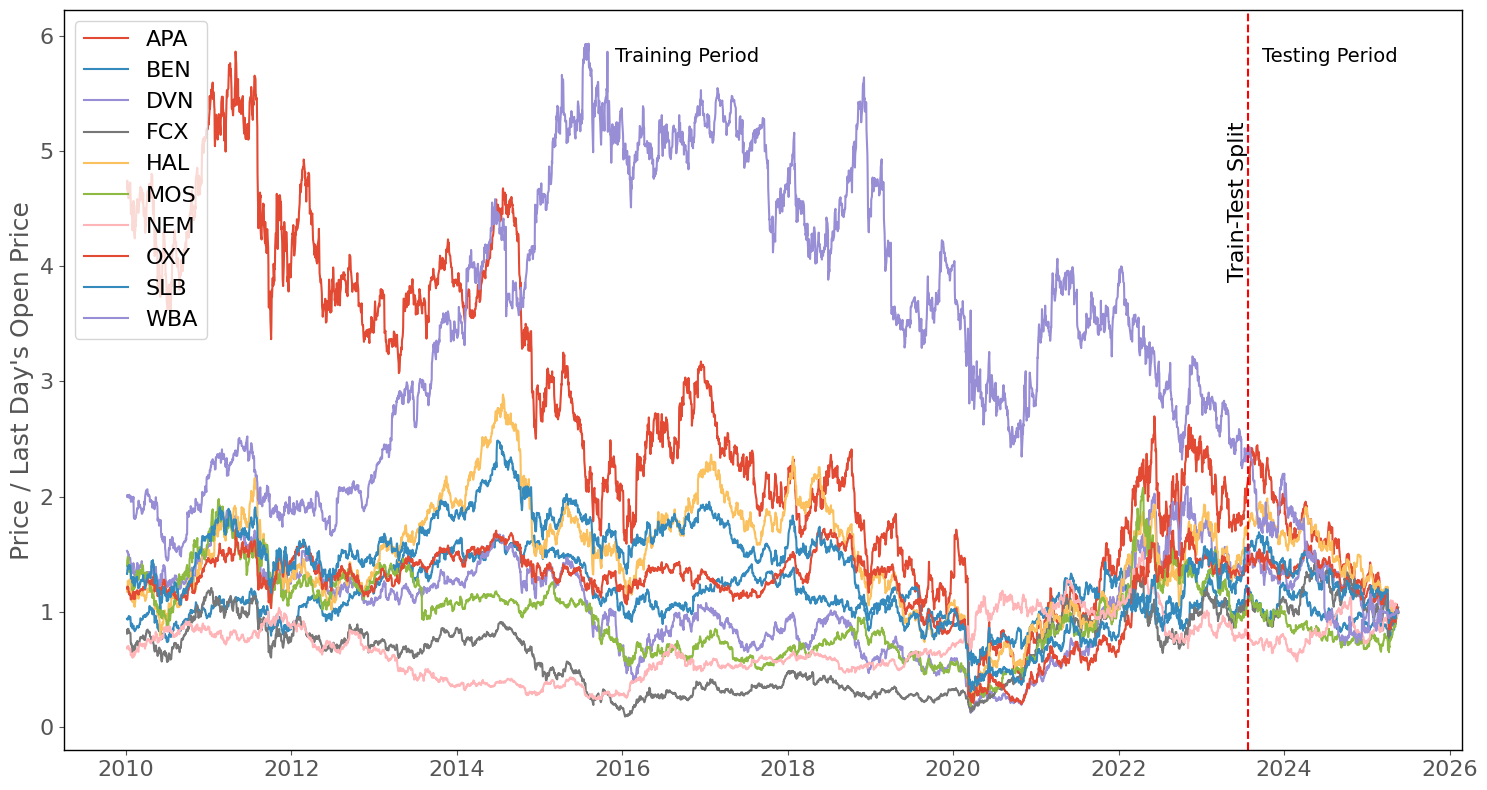

In [25]:
# 设置字体大小参数
LABEL_FONT_SIZE = 14  # 区间标签的字体大小
LEGEND_FONT_SIZE = 16 # 图例的字体大小
SPLIT_LABEL_FONT_SIZE = 16  # 分割线标签的字体大小
AXIS_LABEL_FONT_SIZE = 18  # 轴标签的字体大小
TICK_FONT_SIZE = 16  # 刻度标签的字体大小

# 准备归一化数据
data_window = df.copy()
open = data_window.xs('open', axis=1, level='Price')
data_window = data_window.divide(open.iloc[-1], level='Pair')
data_window = data_window.drop('open', axis=1, level='Price')

# 创建图形
fig, ax = plt.subplots(figsize=(15, 8))
plt.style.use('default')  # 使用默认样式
plt.grid(False)


# 设置背景颜色
ax.set_facecolor('white')  # 设置坐标轴区域背景为白色
fig.set_facecolor('white')  # 设置整个图形背景为白色
fig.patch.set_alpha(0.0)   # 设置图形背景透明度为0
ax.patch.set_alpha(0.0)    # 设置坐标轴区域背景透明度为0

# 添加边框
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# 可以设置边框颜色（可选）
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

# 绘制归一化后的收盘价走势
data_window.xs('close', axis=1, level='Price').plot(ax=ax)

# 添加训练集-测试集分割线
split_date = pd.Timestamp('2023-07-26')  # 注意：这里设置分割的日期 (Note: Set the split date here)
ax.axvline(x=split_date, color='red', linestyle='--')

# 获取数据的时间索引并确保是排序的
time_index = data_window.index.sort_values()

# 获取训练集和测试集的日期范围
train_dates = time_index[time_index < split_date]
test_dates = time_index[time_index >= split_date]

# 计算训练集中点位置
train_period_center = train_dates[len(train_dates)//2]

# 计算Testing Period的位置
test_period_start = test_dates[0]
test_period_end = test_dates[-1]
# 将Testing Period位置设置在测试集中间偏右的位置
test_period_center = test_period_start + pd.Timedelta(days=60)  # 增加到60天，使标签更靠右

# 获取y轴范围
y_min, y_max = ax.get_ylim()
y_text_position = y_max - (y_max - y_min) * 0.05  # 将文本位置向下调整5%
split_text_position = y_max - (y_max - y_min) * 0.15  # 将分割线文本位置再向下调整

# 添加文本标注
ax.text(split_date, split_text_position, 'Train-Test Split', 
        rotation=90, verticalalignment='top', horizontalalignment='right',
        fontsize=SPLIT_LABEL_FONT_SIZE)
ax.text(train_period_center, y_text_position, 'Training Period', 
        horizontalalignment='center', verticalalignment='top',
        fontsize=LABEL_FONT_SIZE)
ax.text(test_period_center, y_text_position, 'Testing Period', 
        horizontalalignment='left', verticalalignment='top',
        fontsize=LABEL_FONT_SIZE)

# 设置图表标题和标签
# ax.set_title('Normalized Stock Prices with Train-Test Split')
ax.set_xlabel('')
ax.set_ylabel("Price / Last Day's Open Price", fontsize=AXIS_LABEL_FONT_SIZE)  # "Price Normalized by Final Open Price"

# 设置刻度标签字体大小、方向和对齐方式
ax.tick_params(axis='both', labelsize=TICK_FONT_SIZE)

# 获取当前x轴刻度位置和标签
locs, labels = plt.xticks()
# 重新设置标签，调整对齐方式和旋转角度
plt.setp(ax.get_xticklabels(), horizontalalignment='center', rotation=0)  # 添加rotation=0保持水平显示


# 将图例放在图形内左上角，设置字体大小
plt.legend(loc='upper left', fontsize=LEGEND_FONT_SIZE)

# 调整布局
plt.tight_layout()
plt.show()


In [26]:
%%capture
cd data

In [27]:
fig.savefig('./img/taining&testing_periods_sp500.svg', 
                      bbox_inches='tight',
                      dpi=300,
                      format='svg',
                      transparent=True)